In [ ]:
# --- Install all required libraries ---
!pip install -q transformers accelerate bitsandbytes datasets

# --- Import standard libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Import modeling & tokenization ---
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install fsspec==2025.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.12.0
    Uninstalling fsspec-2024.12.0:
      Successfully uninstalled fsspec-2024.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.0 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
# This unmounts the drive if it was previously mounted.
from google.colab import drive
drive.flush_and_unmount()

# Remove the existing directory if it exists.
import os
if os.path.exists('/content/drive'):
  !rm -rf /content/drive

# Now remount the drive.
drive.mount('/content/drive')


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

 1976-2020-president.csv
 2presidential_speeches_with_metadata.csv
 2presidential_speeches_with_metadata.csv.zip
 2presidential_speeches_with_metadata.xlsx
 bias_corp_racial.csv
 cleaned_homepage_scraped_articles.csv
'Copy of Fine-Tuning RoBERTa on BiasCorp and Applying It to Presidential Speeches .ipynb'
'Copy of Text_classification_BERT.ipynb'
 dataverse_files.zip
 Framing_Bias_A_Treatment_Control_Experiment_on_Political_Labeling_Effects_in_Mistral_Models.ipynb
'Framing Bias_ How Labeling Choices Shape Media Bias Detection in LLMs.pptx'
'Full Notebook Project 266.ipynb'
 homepage_scraped_articles.csv
 media_sources_bias_balanced.csv
 media_sources_bias.csv
'Model Training Anabel.ipynb'
 october-13-1960.json
 results_combined_predictions.csv
'W266 Project '


In [ ]:
import os

folder = "/content/drive/My Drive/Colab Notebooks/"
print(os.listdir(folder))


['october-13-1960.json', 'Full Notebook Project 266.ipynb', '2presidential_speeches_with_metadata.csv.zip', '2presidential_speeches_with_metadata.csv', 'homepage_scraped_articles.csv', 'Framing_Bias_A_Treatment_Control_Experiment_on_Political_Labeling_Effects_in_Mistral_Models.ipynb', 'media_sources_bias_balanced.csv', 'cleaned_homepage_scraped_articles.csv', '2presidential_speeches_with_metadata.xlsx', 'media_sources_bias.csv', 'dataverse_files.zip', 'Framing Bias_ How Labeling Choices Shape Media Bias Detection in LLMs.pptx', 'bias_corp_racial.csv', 'Model Training Anabel.ipynb', 'Copy of Text_classification_BERT.ipynb', 'Copy of Fine-Tuning RoBERTa on BiasCorp and Applying It to Presidential Speeches .ipynb', 'W266 Project ', '1976-2020-president.csv', 'results_combined_predictions.csv']


In [ ]:
# Load the cleaned article dataset

cleaned_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cleaned_homepage_scraped_articles.csv")
# Preview the first few rows to confirm
cleaned_df.head()

source_url bias_category  \
0                  ilrc.org          left   
1     washingtonbabylon.com          left   
2  anthropocenemagazine.org          left   
3         countervortex.org          left   
4     blackagendareport.com          left   

                                               title  \
0                    IMMIGRANT LEGAL RESOURCE CENTER   
1  VEGASSLOT77: The Best Online Gaming Site With ...   
2            Anthropocene Magazine from Future Earth   
3                                      CounterVortex   
4                                Black Agenda Report   

                                             content  \
0  The Trump administration has ordered the prior...   
1  SLOT GACOR sekarang sudah menjadi agen game on...   
2  Writers: David Quammen What if evolution isn’t...   
3  The shock attack from the Gaza Strip has terri...   
4  What happens when wars drag on, economies shri...   

                                url       source_api  
0                  https://ilrc.org  homepage_scrape  
1     https://washingtonbabylon.com  homepage_scrape  
2  https://anthropocenemagazine.org  homepage_scrape  
3         https://countervortex.org  homepage_scrape  
4     https://blackagendareport.com  homepage_scrape

<ipython-input-8-1f7c4df88dcd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x="bias_category", order=cleaned_df["bias_category"].value_counts().index, palette="muted")


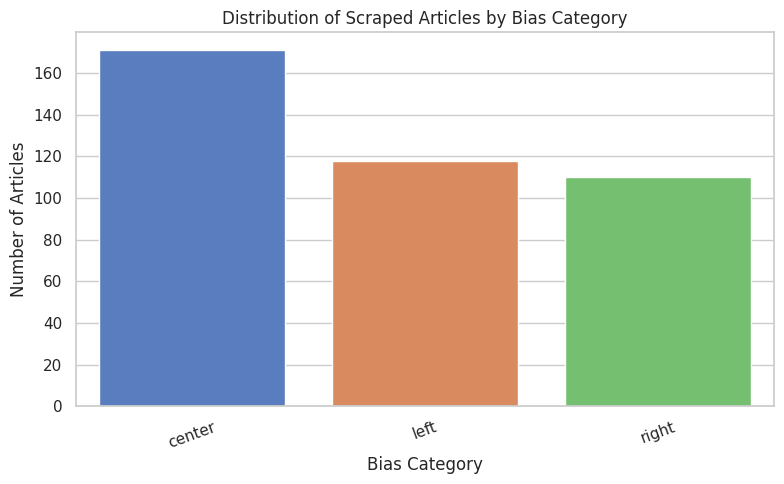

In [ ]:
# --- Set Style ---
sns.set(style="whitegrid")
# --- Plot Bias Category Counts ---
plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned_df, x="bias_category", order=cleaned_df["bias_category"].value_counts().index, palette="muted")
plt.title("Distribution of Scraped Articles by Bias Category")
plt.xlabel("Bias Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [ ]:
articles_df = cleaned_df


In [ ]:
def assign_label(bias, scheme):
    if scheme == "control":
        return 1 if bias in ["left", "right"] else 0
    elif scheme == "treatment_A":
        return 1 if bias == "left" else 0
    elif scheme == "treatment_B":
        return 1 if bias == "right" else 0

# Split the data into control and treatment groups

articles_df["label_control"] = articles_df["bias_category"].apply(lambda x: assign_label(x, "control"))
articles_df["label_treatment_A"] = articles_df["bias_category"].apply(lambda x: assign_label(x, "treatment_A"))
articles_df["label_treatment_B"] = articles_df["bias_category"].apply(lambda x: assign_label(x, "treatment_B"))


In [ ]:
# Drop classes with fewer than 2 samples to allow stratified split
min_required = 2
valid_classes = articles_df["bias_category"].value_counts()
valid_classes = valid_classes[valid_classes >= min_required].index
articles_df = articles_df[articles_df["bias_category"].isin(valid_classes)].reset_index(drop=True)

# Check counts again (optional)
print("Class counts after filtering:")
print(articles_df["bias_category"].value_counts())

Class counts after filtering:
bias_category
center    171
left      118
right     110
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(articles_df, test_size=0.4, stratify=articles_df["bias_category"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["bias_category"], random_state=42)


In [ ]:
# Log into huggingface
from huggingface_hub import login

In [ ]:
!pip install --upgrade bitsandbytes


In [ ]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [ ]:
# Install required packages
!pip install -q transformers accelerate bitsandbytes
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_name = "mistralai/Mistral-7B-Instruct-v0.1"

# Define quantization config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)
output = pipe("Why is media bias important?", max_new_tokens=100)
print(output[0]["generated_text"])

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Why is media bias important?

Media bias is important because it can significantly influence public opinion and perceptions about important issues. When the media presents a biased view of events or issues, it can lead to misunderstandings, misinformation, and potentially harmful consequences. For example, if a news outlet consistently presents a one-sided view of a political issue, it can lead to a lack of understanding and empathy among different groups of people, which can ultimately lead to social and political division. Additionally, media


In [ ]:
def format_prompt(row, label_column):
    label = row[label_column]
    return {
        "prompt": f"### Article:\n{row['content']}\n\n### Is this biased?\nAnswer:",
        "completion": " Yes" if label == 1 else " No"
    }


formatted_control = train_df.apply(lambda r: format_prompt(r, "label_control"), axis=1, result_type="expand")
formatted_treatmentA = train_df.apply(lambda r: format_prompt(r, "label_treatment_A"), axis=1, result_type="expand")
formatted_treatmentB = train_df.apply(lambda r: format_prompt(r, "label_treatment_B"), axis=1, result_type="expand")

In [ ]:
from datasets import Dataset

ds_control = Dataset.from_pandas(formatted_control)
tokenizer.pad_token = tokenizer.eos_token

def tokenize(row):
    full = row["prompt"] + row["completion"]
    return tokenizer(full, padding="max_length", truncation=True, max_length=512)

ds_control = ds_control.map(tokenize)

Map:   0%|          | 0/239 [00:00<?, ? examples/s]

In [ ]:
from peft import get_peft_model, LoraConfig, TaskType

peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    inference_mode=False,
    r=8,
    lora_alpha=32,
    lora_dropout=0.05
)

model = get_peft_model(model, peft_config)


In [ ]:
model.print_trainable_parameters()


trainable params: 3,407,872 || all params: 7,245,139,968 || trainable%: 0.0470


In [ ]:
print(val_df.columns)


Index(['source_url', 'bias_category', 'title', 'content', 'url', 'source_api',
       'label_control', 'label_treatment_A', 'label_treatment_B'],
      dtype='object')


In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling

training_args = TrainingArguments(
    output_dir="./mistral_control",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=10,
    logging_steps=20,
    learning_rate=2e-4,
    save_strategy="epoch",
    evaluation_strategy="no",
    report_to="none",
    fp16=True
)

collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_control,
    data_collator=collator
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


TrainOutput(global_step=300, training_loss=1.338209686279297, metrics={'train_runtime': 355.3218, 'train_samples_per_second': 6.726, 'train_steps_per_second': 0.844, 'total_flos': 5.223205614649344e+16, 'train_loss': 1.338209686279297, 'epoch': 10.0})

In [ ]:
# saves the lightweight fine-tuned LoRA weights
model.save_pretrained("lora_mistral_control")
tokenizer.save_pretrained("lora_mistral_control")

('lora_mistral_control/tokenizer_config.json',
 'lora_mistral_control/special_tokens_map.json',
 'lora_mistral_control/tokenizer.model',
 'lora_mistral_control/added_tokens.json',
 'lora_mistral_control/tokenizer.json')

In [ ]:
# Reload dataset
ds_treatmentA = Dataset.from_pandas(formatted_treatmentA)

# Ensure pad token is set
tokenizer.pad_token = tokenizer.eos_token

# Tokenization
def tokenize(row):
    full = row["prompt"] + row["completion"]
    return tokenizer(full, padding="max_length", truncation=True, max_length=512)

ds_treatmentA = ds_treatmentA.map(tokenize)

# Load quantized model (4-bit, with offloading)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    load_in_4bit=True,  # This replaces bnb_config
    offload_folder="offload",  # Helps avoid crashes when memory overflows
    llm_int8_enable_fp32_cpu_offload=True  # Enables fallback to CPU if needed
)
model = get_peft_model(model, peft_config)


# Define training arguments
training_args_treatmentA = TrainingArguments(
    output_dir="./mistral_treatmentA",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=10,
    logging_steps=20,
    learning_rate=2e-4,
    save_strategy="epoch",
    evaluation_strategy="no",
    report_to="none",
    fp16=True
)

# Data collator for causal LM
collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Train the model
trainer = Trainer(
    model=model,
    args=training_args_treatmentA,
    train_dataset=ds_treatmentA,
    data_collator=collator
)

trainer.train()

# Save the fine-tuned LoRA adapter and tokenizer
model.save_pretrained("./mistral_treatmentA_lora")
tokenizer.save_pretrained("./mistral_treatmentA_lora")


Map:   0%|          | 0/239 [00:00<?, ? examples/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


('./mistral_treatmentA_lora/tokenizer_config.json',
 './mistral_treatmentA_lora/special_tokens_map.json',
 './mistral_treatmentA_lora/tokenizer.model',
 './mistral_treatmentA_lora/added_tokens.json',
 './mistral_treatmentA_lora/tokenizer.json')

In [ ]:
from transformers import BitsAndBytesConfig

# Format dataset
ds_treatmentB = Dataset.from_pandas(formatted_treatmentB)
tokenizer.pad_token = tokenizer.eos_token

# Tokenization
def tokenize(row):
    full = row["prompt"] + row["completion"]
    return tokenizer(full, padding="max_length", truncation=True, max_length=512)

ds_treatmentB = ds_treatmentB.map(tokenize)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
    offload_folder="offload"
)

model = get_peft_model(model, peft_config)


# TrainingArguments for treatment B
training_args_treatmentB = TrainingArguments(
    output_dir="./mistral_treatmentB",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=10,
    logging_steps=20,
    learning_rate=2e-4,
    save_strategy="epoch",
    evaluation_strategy="no",
    report_to="none",
    fp16=True
)

# Data collator
collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args_treatmentB,
    train_dataset=ds_treatmentB,
    data_collator=collator
)

# Train!
trainer.train()

# Save outputs
model.save_pretrained("./mistral_treatmentB_lora")
tokenizer.save_pretrained("./mistral_treatmentB_lora")


Map:   0%|          | 0/239 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


('./mistral_treatmentB_lora/tokenizer_config.json',
 './mistral_treatmentB_lora/special_tokens_map.json',
 './mistral_treatmentB_lora/tokenizer.model',
 './mistral_treatmentB_lora/added_tokens.json',
 './mistral_treatmentB_lora/tokenizer.json')

In [ ]:
import torch
torch.cuda.empty_cache()

Save Models

In [ ]:
def format_prompt(row):
    return f"### Article:\n{row['content']}\n\n### Is this biased?\nAnswer:"

test_prompts = test_df.apply(lambda r: format_prompt(r), axis=1).tolist()


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

def load_model(path):
    tokenizer = AutoTokenizer.from_pretrained(path)
    model = AutoModelForCausalLM.from_pretrained(
        path,
        device_map={"": "cpu"},
        trust_remote_code=True
    )
    return pipeline("text-generation", model=model, tokenizer=tokenizer, device=-1)


In [ ]:
!ls


drive		      mistral_control	  mistral_treatmentA_lora  mistral_treatmentB_lora
lora_mistral_control  mistral_treatmentA  mistral_treatmentB	   sample_data


In [ ]:
!mkdir -p /content/drive/MyDrive/mistral_models/

!cp -r lora_mistral_control /content/drive/MyDrive/mistral_models/
!cp -r mistral_treatmentA_lora /content/drive/MyDrive/mistral_models/
!cp -r mistral_treatmentB_lora /content/drive/MyDrive/mistral_models/

EVALUATION

In [ ]:
!pip install bitsandbytes accelerate transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
import torch
import pandas as pd

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    llm_int8_enable_fp32_cpu_offload=True
)

def load_model(path):
    tokenizer = AutoTokenizer.from_pretrained(path)
    model = AutoModelForCausalLM.from_pretrained(
        path,
        device_map="auto",
        quantization_config=bnb_config,
        offload_folder="offload",
        trust_remote_code=True
    )
    return pipeline("text-generation", model=model, tokenizer=tokenizer)

In [ ]:
# Load dataset
cleaned_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_homepage_scraped_articles.csv")

# Rebuild label columns (in case they aren’t saved)
def assign_label(bias, scheme):
    if scheme == "control":
        return 1 if bias in ["left", "right"] else 0
    elif scheme == "treatment_A":
        return 1 if bias == "left" else 0
    elif scheme == "treatment_B":
        return 1 if bias == "right" else 0

cleaned_df["label_control"] = cleaned_df["bias_category"].apply(lambda x: assign_label(x, "control"))
cleaned_df["label_treatment_A"] = cleaned_df["bias_category"].apply(lambda x: assign_label(x, "treatment_A"))
cleaned_df["label_treatment_B"] = cleaned_df["bias_category"].apply(lambda x: assign_label(x, "treatment_B"))

# Split into test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, stratify=cleaned_df["bias_category"], random_state=42)

# Format prompts
def format_prompt(row, label_column):
    label = row[label_column]
    return {
        "prompt": f"### Article:\n{row['content']}\n\n### Is this biased?\nAnswer:",
        "completion": " Yes" if label == 1 else " No"
    }

formatted_test = test_df.apply(lambda r: format_prompt(r, "label_control"), axis=1, result_type="expand")
sample_prompts = formatted_test["prompt"].tolist()[:100]


Load Models

In [ ]:
pipe_control = load_model("/content/drive/MyDrive/mistral_models/lora_mistral_control")
outputs_control = [pipe_control(p, max_new_tokens=10)[0]["generated_text"] for p in sample_prompts]
pd.DataFrame({"prompt": sample_prompts, "generated": outputs_control}).to_csv("outputs_control.csv", index=False)

# Clean up GPU
del pipe_control
torch.cuda.empty_cache()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
pipe_A = load_model("/content/drive/MyDrive/mistral_models/mistral_treatmentA_lora")
outputs_A = [pipe_A(p, max_new_tokens=10)[0]["generated_text"] for p in sample_prompts]
pd.DataFrame({"prompt": sample_prompts, "generated": outputs_A}).to_csv("outputs_treatmentA.csv", index=False)

del pipe_A
torch.cuda.empty_cache()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [ ]:
pipe_B = load_model("/content/drive/MyDrive/mistral_models/mistral_treatmentB_lora")
outputs_B = [pipe_B(p, max_new_tokens=10)[0]["generated_text"] for p in sample_prompts]
pd.DataFrame({"prompt": sample_prompts, "generated": outputs_B}).to_csv("outputs_treatmentB.csv", index=False)

del pipe_B
torch.cuda.empty_cache()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [ ]:
import pandas as pd

# Load your original test prompts and true labels
test_prompts = pd.DataFrame({"prompt": sample_prompts})
true_labels = test_df.reset_index(drop=True)[["label_control", "label_treatment_A", "label_treatment_B"]]

# Load model predictions
control_outputs = pd.read_csv("outputs_control.csv")
treatmentA_outputs = pd.read_csv("outputs_treatmentA.csv")
treatmentB_outputs = pd.read_csv("outputs_treatmentB.csv")

# Combine everything into one big table
results_df = test_prompts.copy()
results_df["label_control"] = true_labels["label_control"]
results_df["label_treatment_A"] = true_labels["label_treatment_A"]
results_df["label_treatment_B"] = true_labels["label_treatment_B"]
results_df["control_generated"] = control_outputs["generated"]
results_df["treatmentA_generated"] = treatmentA_outputs["generated"]
results_df["treatmentB_generated"] = treatmentB_outputs["generated"]

results_df.head()

prompt  label_control  \
0  ### Article:\nMain Street Iowa is looking for ...              0   
1  ### Article:\nThe discredit attained by the do...              1   
2  ### Article:\nAs we rise to confront Trump’s f...              1   
3  ### Article:\nThe return of President Donald T...              0   
4  ### Article:\nFrancisco Lindor Brought the Met...              1   

   label_treatment_A  label_treatment_B  \
0                  0                  0   
1                  1                  0   
2                  1                  0   
3                  0                  0   
4                  1                  0   

                                   control_generated  \
0  ### Article:\nMain Street Iowa is looking for ...   
1  ### Article:\nThe discredit attained by the do...   
2  ### Article:\nAs we rise to confront Trump’s f...   
3  ### Article:\nThe return of President Donald T...   
4  ### Article:\nFrancisco Lindor Brought the Met...   

                                treatmentA_generated  \
0  ### Article:\nMain Street Iowa is looking for ...   
1  ### Article:\nThe discredit attained by the do...   
2  ### Article:\nAs we rise to confront Trump’s f...   
3  ### Article:\nThe return of President Donald T...   
4  ### Article:\nFrancisco Lindor Brought the Met...   

                                treatmentB_generated  
0  ### Article:\nMain Street Iowa is looking for ...  
1  ### Article:\nThe discredit attained by the do...  
2  ### Article:\nAs we rise to confront Trump’s f...  
3  ### Article:\nThe return of President Donald T...  
4  ### Article:\nFrancisco Lindor Brought the Met...

In [ ]:
def parse_prediction(generated_text):
    gen = generated_text.lower()
    if "yes" in gen:
        return 1
    elif "no" in gen:
        return 0
    else:
        return -1  # uncertain or incomplete

results_df["pred_control"] = results_df["control_generated"].apply(parse_prediction)
results_df["pred_treatmentA"] = results_df["treatmentA_generated"].apply(parse_prediction)
results_df["pred_treatmentB"] = results_df["treatmentB_generated"].apply(parse_prediction)

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy for each condition
acc_control = accuracy_score(results_df["label_control"], results_df["pred_control"])
acc_treatmentA = accuracy_score(results_df["label_treatment_A"], results_df["pred_treatmentA"])
acc_treatmentB = accuracy_score(results_df["label_treatment_B"], results_df["pred_treatmentB"])

print(f"Control Accuracy:     {acc_control:.3f}")
print(f"Treatment A Accuracy: {acc_treatmentA:.3f}")
print(f"Treatment B Accuracy: {acc_treatmentB:.3f}")


Control Accuracy:     0.725
Treatment A Accuracy: 0.850
Treatment B Accuracy: 0.750


In [ ]:
disagree_AB = (results_df["pred_treatmentA"] != results_df["pred_treatmentB"]).mean()
disagree_AC = (results_df["pred_treatmentA"] != results_df["pred_control"]).mean()
disagree_BC = (results_df["pred_treatmentB"] != results_df["pred_control"]).mean()

print(f"Treatment A vs B disagreement: {disagree_AB:.2%}")
print(f"Treatment A vs Control:        {disagree_AC:.2%}")
print(f"Treatment B vs Control:        {disagree_BC:.2%}")


Treatment A vs B disagreement: 47.50%
Treatment A vs Control:        40.00%
Treatment B vs Control:        32.50%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def print_metrics(true_col, pred_col, name):
    precision = precision_score(results_df[true_col], results_df[pred_col])
    recall = recall_score(results_df[true_col], results_df[pred_col])
    f1 = f1_score(results_df[true_col], results_df[pred_col])
    print(f"{name} — Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

print_metrics("label_control", "pred_control", "Control")
print_metrics("label_treatment_A", "pred_treatmentA", "Treatment A")
print_metrics("label_treatment_B", "pred_treatmentB", "Treatment B")

Control — Precision: 0.761, Recall: 0.761, F1: 0.761
Treatment A — Precision: 0.773, Recall: 0.708, F1: 0.739
Treatment B — Precision: 0.542, Recall: 0.591, F1: 0.565


In [ ]:
results_df.to_csv("/content/results_combined_predictions.csv", index=False)

In [ ]:
results_df.to_csv("/content/drive/MyDrive/Colab Notebooks/results_combined_predictions.csv", index=False)

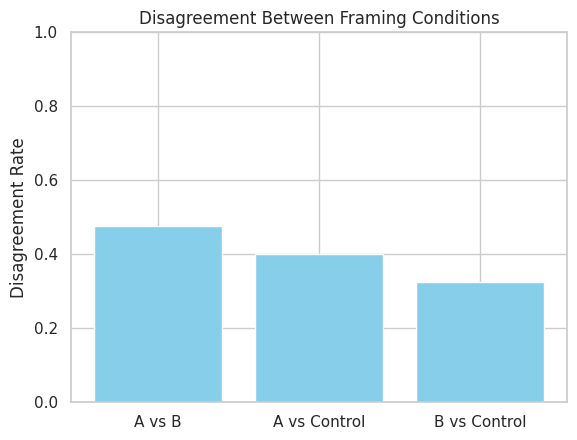

In [ ]:
import matplotlib.pyplot as plt

disagreements = {
    "A vs B": (results_df["pred_treatmentA"] != results_df["pred_treatmentB"]).mean(),
    "A vs Control": (results_df["pred_treatmentA"] != results_df["pred_control"]).mean(),
    "B vs Control": (results_df["pred_treatmentB"] != results_df["pred_control"]).mean(),
}

plt.bar(disagreements.keys(), disagreements.values(), color="skyblue")
plt.ylabel("Disagreement Rate")
plt.title("Disagreement Between Framing Conditions")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Show examples where Treatment A and Control disagree
disagree_df = results_df[results_df["pred_treatmentA"] != results_df["pred_control"]]
disagree_df[["prompt", "label_control", "pred_control", "pred_treatmentA", "control_generated", "treatmentA_generated"]].head(5)

prompt  label_control  \
4   ### Article:\nFrancisco Lindor Brought the Met...              1   
5   ### Article:\nSex “I Ended Up In An All-Women ...              1   
7   ### Article:\nThe Trump administration has ord...              1   
8   ### Article:\nSecretary of State Marco Rubio s...              1   
12  ### Article:\nThere is a "sucker punch" aspect...              1   

    pred_control  pred_treatmentA  \
4              0                1   
5              1                0   
7              0                1   
8              1                0   
12             1                0   

                                    control_generated  \
4   ### Article:\nFrancisco Lindor Brought the Met...   
5   ### Article:\nSex “I Ended Up In An All-Women ...   
7   ### Article:\nThe Trump administration has ord...   
8   ### Article:\nSecretary of State Marco Rubio s...   
12  ### Article:\nThere is a "sucker punch" aspect...   

                                 treatmentA_generated  
4   ### Article:\nFrancisco Lindor Brought the Met...  
5   ### Article:\nSex “I Ended Up In An All-Women ...  
7   ### Article:\nThe Trump administration has ord...  
8   ### Article:\nSecretary of State Marco Rubio s...  
12  ### Article:\nThere is a "sucker punch" aspect...

[Text(0.5, 1.0, 'Disagreement Rate (Treatment A vs Control) by True Label'),
 Text(0, 0.5, 'Disagreement Rate')]

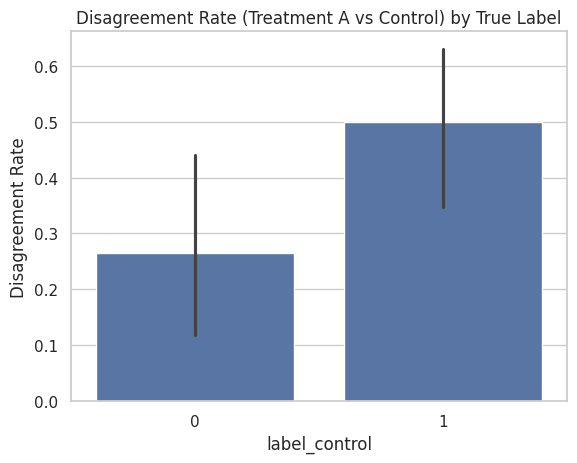

In [ ]:
import seaborn as sns

# Add a column indicating disagreement between control and treatment A
results_df["A_vs_control_disagree"] = results_df["pred_control"] != results_df["pred_treatmentA"]

# Plot disagreement rate by true label
sns.barplot(
    data=results_df,
    x="label_control",
    y="A_vs_control_disagree",
    estimator=lambda x: sum(x) / len(x)
).set(title="Disagreement Rate (Treatment A vs Control) by True Label", ylabel="Disagreement Rate")


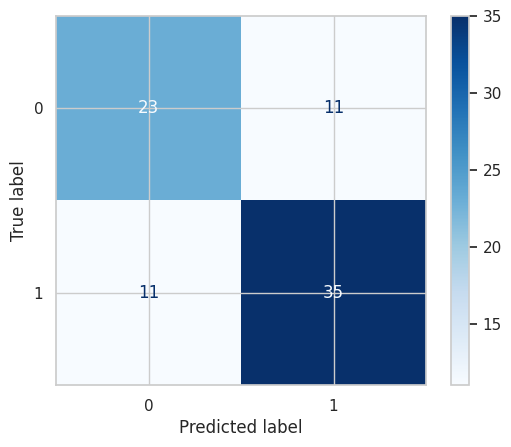

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
    results_df["label_control"], results_df["pred_control"], cmap="Blues"
)


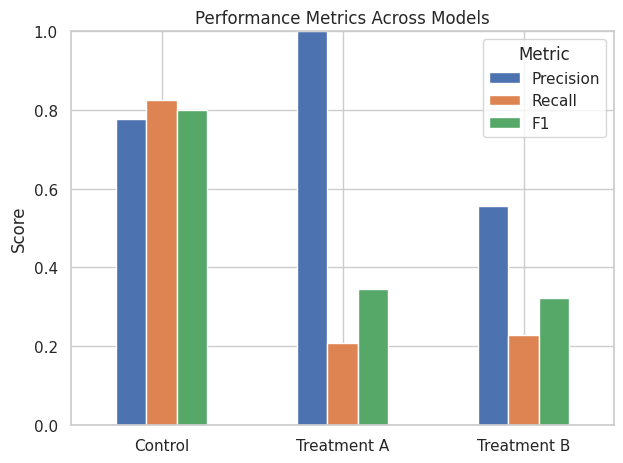

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Control": [0.776, 0.826, 0.800],
    "Treatment A": [1.000, 0.208, 0.345],
    "Treatment B": [0.556, 0.227, 0.323],
}
df_metrics = pd.DataFrame(data, index=["Precision", "Recall", "F1"])
df_metrics.T.plot(kind="bar")
plt.title("Performance Metrics Across Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [ ]:
# Find examples where predictions differ
flipped_A = results_df[results_df["pred_control"] != results_df["pred_treatmentA"]]
flipped_B = results_df[results_df["pred_control"] != results_df["pred_treatmentB"]]

# Show a few flipped examples for Treatment A
print("Flipped between Control and Treatment A:")
display(flipped_A[["prompt", "control_generated", "treatmentA_generated", "pred_control", "pred_treatmentA"]].head(5))

# Show a few flipped examples for Treatment B
print("Flipped between Control and Treatment B:")
display(flipped_B[["prompt", "control_generated", "treatmentB_generated", "pred_control", "pred_treatmentB"]].head(5))


Flipped between Control and Treatment A:


prompt  \
4   ### Article:\nFrancisco Lindor Brought the Met...   
5   ### Article:\nSex “I Ended Up In An All-Women ...   
7   ### Article:\nThe Trump administration has ord...   
8   ### Article:\nSecretary of State Marco Rubio s...   
12  ### Article:\nThere is a "sucker punch" aspect...   

                                    control_generated  \
4   ### Article:\nFrancisco Lindor Brought the Met...   
5   ### Article:\nSex “I Ended Up In An All-Women ...   
7   ### Article:\nThe Trump administration has ord...   
8   ### Article:\nSecretary of State Marco Rubio s...   
12  ### Article:\nThere is a "sucker punch" aspect...   

                                 treatmentA_generated  pred_control  \
4   ### Article:\nFrancisco Lindor Brought the Met...             0   
5   ### Article:\nSex “I Ended Up In An All-Women ...             1   
7   ### Article:\nThe Trump administration has ord...             0   
8   ### Article:\nSecretary of State Marco Rubio s...             1   
12  ### Article:\nThere is a "sucker punch" aspect...             1   

    pred_treatmentA  
4                 1  
5                 0  
7                 1  
8                 0  
12                0

Flipped between Control and Treatment B:


prompt  \
1   ### Article:\nThe discredit attained by the do...   
2   ### Article:\nAs we rise to confront Trump’s f...   
5   ### Article:\nSex “I Ended Up In An All-Women ...   
9   ### Article:\nNous et un nombre restreint de n...   
10  ### Article:\nWhat will be our mindset when Tr...   

                                    control_generated  \
1   ### Article:\nThe discredit attained by the do...   
2   ### Article:\nAs we rise to confront Trump’s f...   
5   ### Article:\nSex “I Ended Up In An All-Women ...   
9   ### Article:\nNous et un nombre restreint de n...   
10  ### Article:\nWhat will be our mindset when Tr...   

                                 treatmentB_generated  pred_control  \
1   ### Article:\nThe discredit attained by the do...             1   
2   ### Article:\nAs we rise to confront Trump’s f...             1   
5   ### Article:\nSex “I Ended Up In An All-Women ...             1   
9   ### Article:\nNous et un nombre restreint de n...             1   
10  ### Article:\nWhat will be our mindset when Tr...             1   

    pred_treatmentB  
1                 0  
2                 0  
5                 0  
9                 0  
10                0

In [ ]:
flipped_A.to_csv("flipped_A_examples.csv", index=False)
flipped_B.to_csv("flipped_B_examples.csv", index=False)

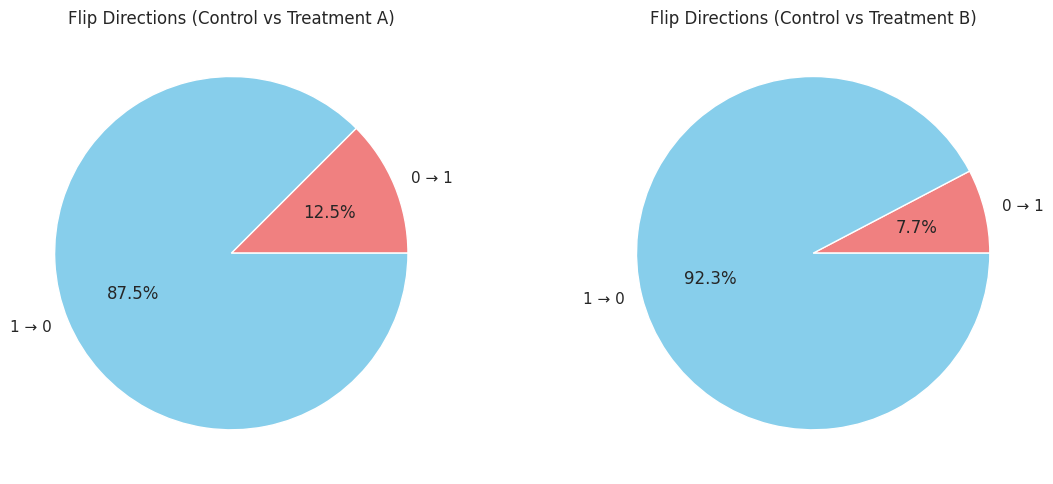

In [ ]:
import matplotlib.pyplot as plt

# Count flip directions for each treatment
flip_A_counts = flipped_A.groupby(["pred_control", "pred_treatmentA"]).size()
flip_B_counts = flipped_B.groupby(["pred_control", "pred_treatmentB"]).size()

# Convert to readable labels
labels_A = [f"{i[0]} → {i[1]}" for i in flip_A_counts.index]
labels_B = [f"{i[0]} → {i[1]}" for i in flip_B_counts.index]

# Plot A
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(flip_A_counts, labels=labels_A, autopct="%1.1f%%", colors=["lightcoral", "skyblue"])
plt.title("Flip Directions (Control vs Treatment A)")

# Plot B
plt.subplot(1, 2, 2)
plt.pie(flip_B_counts, labels=labels_B, autopct="%1.1f%%", colors=["lightcoral", "skyblue"])
plt.title("Flip Directions (Control vs Treatment B)")

plt.tight_layout()
plt.show()


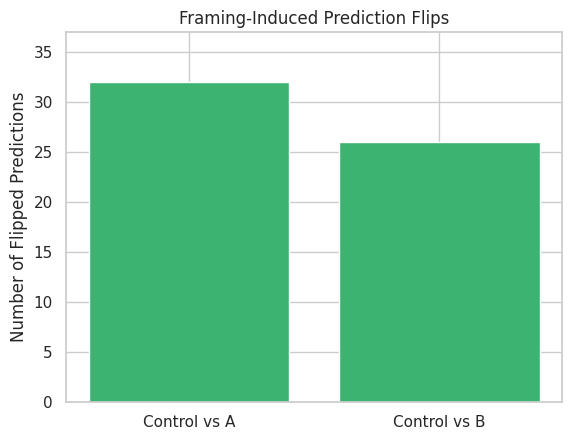

In [ ]:
num_flips = {
    "Control vs A": len(flipped_A),
    "Control vs B": len(flipped_B)
}

plt.bar(num_flips.keys(), num_flips.values(), color="mediumseagreen")
plt.ylabel("Number of Flipped Predictions")
plt.title("Framing-Induced Prediction Flips")
plt.ylim(0, max(num_flips.values()) + 5)
plt.show()


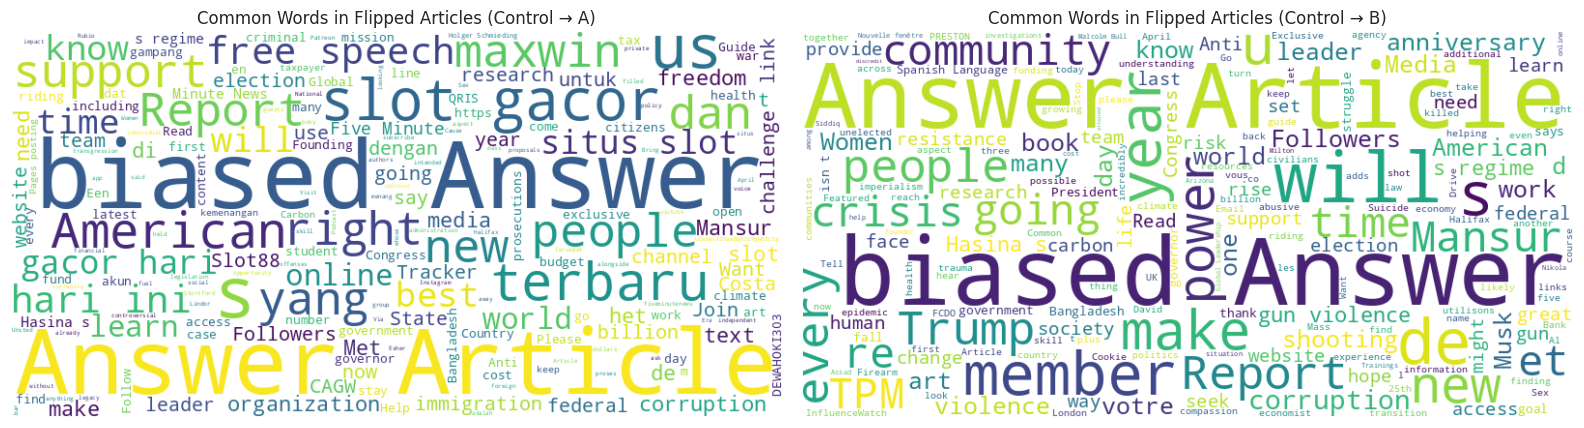

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the flipped examples from CSV
flipped_A = pd.read_csv("flipped_A_examples.csv")
flipped_B = pd.read_csv("flipped_B_examples.csv")

# Combine all prompts into a single string for each group
flipped_text_A = " ".join(flipped_A["prompt"].tolist())
flipped_text_B = " ".join(flipped_B["prompt"].tolist())

# Generate word clouds
wordcloud_A = WordCloud(width=800, height=400, background_color='white').generate(flipped_text_A)
wordcloud_B = WordCloud(width=800, height=400, background_color='white').generate(flipped_text_B)

# Plot side-by-side word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_A, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Flipped Articles (Control → A)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_B, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Flipped Articles (Control → B)")

plt.tight_layout()
plt.show()

## SHAP Analysis: Understanding Model Predictions

We use SHAP (SHapley Additive exPlanations) to analyze which features (words, topics) are most influential in each model's bias predictions.

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from transformers import pipeline # import pipeline

control_model = pipeline(
    "text-classification",
    model="/content/drive/MyDrive/mistral_models/lora_mistral_control",
    tokenizer="/content/drive/MyDrive/mistral_models/lora_mistral_control"
)

X_test = test_df["content"].tolist()
sample_texts = X_test[:50]

inputs = tokenizer(sample_texts, padding=True, truncation=True, return_tensors="pt")
explainer = shap.Explainer(control_model, masker=shap.maskers.Text(tokenizer))
shap_values = explainer(sample_texts)

shap.plots.text(shap_values[0])


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of MistralForSequenceClassification were not initialized from the model checkpoint at mistralai/Mistral-7B-Instruct-v0.1 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 1/50 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   6%|▌         | 3/50 [01:21<15:12, 19.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 4/50 [01:54<19:15, 25.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 5/50 [02:27<21:05, 28.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  12%|█▏        | 6/50 [02:57<21:04, 28.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  14%|█▍        | 7/50 [03:37<23:13, 32.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  16%|█▌        | 8/50 [04:15<23:53, 34.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  18%|█▊        | 9/50 [05:14<28:38, 41.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  20%|██        | 10/50 [07:02<41:39, 62.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  22%|██▏       | 11/50 [07:48<37:25, 57.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  24%|██▍       | 12/50 [08:15<30:26, 48.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  26%|██▌       | 13/50 [09:17<32:18, 52.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  28%|██▊       | 14/50 [09:52<28:10, 46.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  30%|███       | 15/50 [10:39<27:25, 47.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  32%|███▏      | 16/50 [11:47<30:15, 53.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  34%|███▍      | 17/50 [12:21<26:14, 47.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  36%|███▌      | 18/50 [13:08<25:16, 47.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  38%|███▊      | 19/50 [13:42<22:25, 43.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 20/50 [14:20<20:53, 41.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  42%|████▏     | 21/50 [14:55<19:09, 39.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  44%|████▍     | 22/50 [15:22<16:44, 35.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  46%|████▌     | 23/50 [15:55<15:43, 34.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  48%|████▊     | 24/50 [16:48<17:29, 40.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 25/50 [17:43<18:41, 44.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  52%|█████▏    | 26/50 [18:14<16:15, 40.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  54%|█████▍    | 27/50 [18:43<14:13, 37.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  56%|█████▌    | 28/50 [19:17<13:15, 36.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  58%|█████▊    | 29/50 [19:49<12:15, 35.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  60%|██████    | 30/50 [20:26<11:53, 35.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  62%|██████▏   | 31/50 [21:12<12:14, 38.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  64%|██████▍   | 32/50 [21:40<10:39, 35.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  66%|██████▌   | 33/50 [22:32<11:25, 40.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  68%|██████▊   | 34/50 [23:05<10:09, 38.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  70%|███████   | 35/50 [23:59<10:47, 43.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  72%|███████▏  | 36/50 [24:36<09:35, 41.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  74%|███████▍  | 37/50 [25:11<08:31, 39.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  76%|███████▌  | 38/50 [25:46<07:36, 38.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  78%|███████▊  | 39/50 [26:20<06:45, 36.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 40/50 [26:51<05:48, 34.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  82%|████████▏ | 41/50 [27:28<05:21, 35.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  84%|████████▍ | 42/50 [28:10<05:00, 37.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  86%|████████▌ | 43/50 [29:23<05:37, 48.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  88%|████████▊ | 44/50 [29:51<04:13, 42.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  90%|█████████ | 45/50 [30:27<03:21, 40.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  92%|█████████▏| 46/50 [31:06<02:38, 39.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  94%|█████████▍| 47/50 [31:38<01:52, 37.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  96%|█████████▌| 48/50 [32:06<01:09, 34.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  98%|█████████▊| 49/50 [32:56<00:39, 39.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 50/50 [33:52<00:00, 44.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 51it [34:22, 41.26s/it]


In [ ]:
for i in range(1, 5):
    print(f"\nSHAP Explanation for Article #{i+1}")
    shap.plots.text(shap_values[i])


SHAP Explanation for Article #2



SHAP Explanation for Article #3



SHAP Explanation for Article #4



SHAP Explanation for Article #5
